 # Oszacowanie liczby Pi metodą Monte Carlo

Metoda Monte Carlo to technika numeryczna polegająca na wykorzystaniu losowych punktów do przybliżania rozwiązań problemów matematycznych. W tym przypadku wykorzystujemy ją do oszacowania wartości liczby π. Idea polega na losowym generowaniu punktów w ćwiartce kwadratu o boku 1 i sprawdzaniu, jaka część z nich trafia do ćwiartki koła wpisanego w ten kwadrat.

Oczekiwany stosunek liczby punktów w ćwiartce koła do liczby wszystkich punktów powinien wynosić π/4. Mnożąc ten stosunek przez 4, możemy oszacować wartość liczby π.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

##  Funkcja do szacowania liczby Pi

Funkcja `estimate_pi` generuje `num_points` losowych punktów wewnątrz kwadratu jednostkowego.  
Następnie sprawdza, które z nich leżą w ćwiartce koła o promieniu 1 (czyli spełniają warunek  
\( x^2 + y^2 \leq 1 \)). Na tej podstawie oblicza przybliżenie liczby π.


In [2]:
def estimate_pi(num_points):
    """Funkcja szacująca wartość liczby Pi metodą Monte Carlo."""
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)
    inside_circle = x**2 + y**2 <= 1
    pi_estimate = (np.sum(inside_circle) / num_points) * 4
    return pi_estimate, x, y, inside_circle

Funkcja `visualize_pi` rysuje wykres punktów wygenerowanych w `estimate_pi`. Punkty wewnątrz ćwiartki koła są oznaczone na niebiesko, a pozostałe na czerwono. W tytule wykresu wyświetlane jest oszacowanie liczby π.


In [3]:
def visualize_pi(num_points):
    """Funkcja wizualizująca metodę Monte Carlo dla zadanej liczby punktów."""
    pi_estimate, x, y, inside_circle = estimate_pi(num_points)
    
    plt.figure(figsize=(6,6))
    plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')
    plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')
    plt.plot([0,1],[1,1], color='black')
    plt.plot([1,1],[0,1], color='black')
    plt.plot([0,1],[0,0], color='black')
    plt.plot([0,0],[0,1], color='black')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Estymacja liczby Pi: {pi_estimate:.4f}')
    plt.show()
    
    return pi_estimate

##  Wizualizacja zbieżności oszacowania i błędu

In [4]:
def plot_pi_estimation(num_points):
    """Funkcja pokazująca, jak liczba Pi jest szacowana z kolejnymi punktami."""
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)
    inside_circle = x**2 + y**2 <= 1
    
    pi_estimations = np.cumsum(inside_circle) / np.arange(1, num_points + 1) * 4
    errors = np.abs((pi_estimations - np.pi) / np.pi) * 100
    
    plt.figure(figsize=(8,5))
    plt.plot(np.arange(1, num_points + 1), pi_estimations, color='blue', label='Oszacowanie π')
    plt.axhline(y=np.pi, color='red', linestyle='dashed', label='Prawdziwa wartość π')
    plt.xlabel('Liczba punktów')
    plt.ylabel('Oszacowanie π')
    plt.title('Zbieżność oszacowania liczby Pi')
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.plot(np.arange(1, num_points + 1), errors, color='green', label='Błąd procentowy')
    plt.xlabel('Liczba punktów')
    plt.ylabel('Błąd procentowy (%)')
    plt.title('Błąd procentowy oszacowania liczby Pi')
    plt.legend()
    plt.grid()
    plt.show()

# Uruchomienie funckji i interpretacja

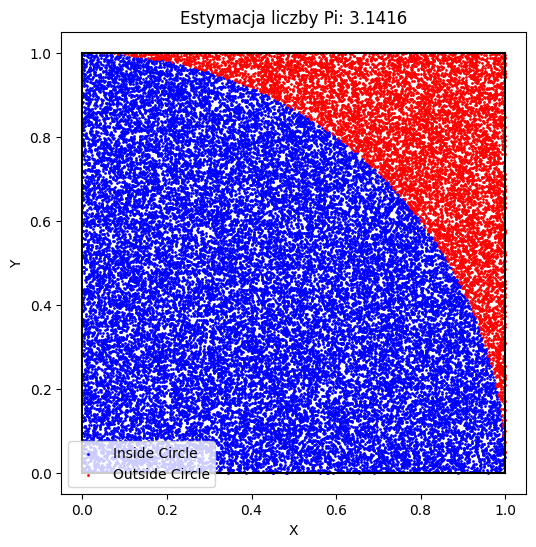

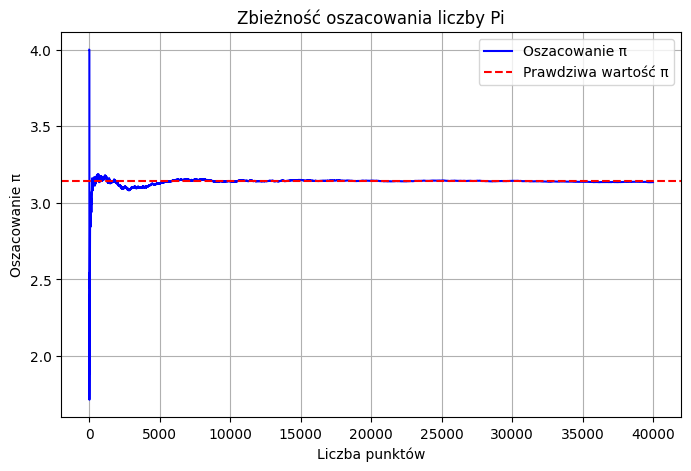

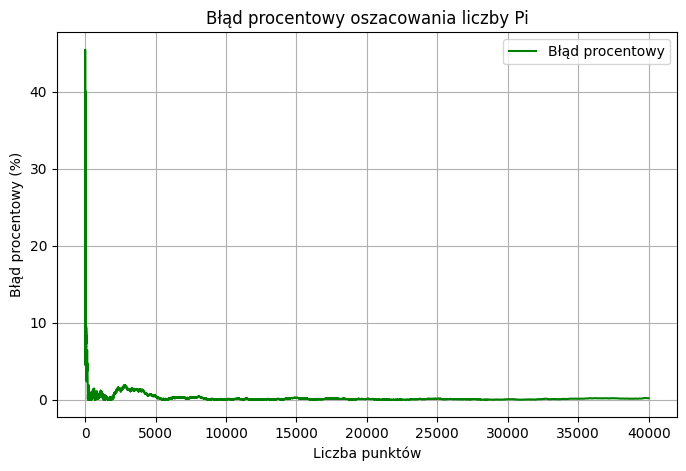

In [6]:
num_points = 40000
pi_estimate = visualize_pi(num_points)
plot_pi_estimation(num_points)

W tej części wykonujemy pełną symulację oraz wizualizacje. Dzięki temu możemy obserwować działanie metody Monte Carlo w praktyce i ocenić jej dokładność w zależności od liczby punktów.
